In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Deloitte Folder/ML/Clustering/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ds=sc.fit_transform(data)

In [6]:
ds

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [7]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,init='random').fit(ds)

In [8]:
km.inertia_

2599.3855593561393

In [9]:
WSS=[]
for clusters in range(1,20):
    kmeans=KMeans(n_clusters=clusters)
    kmeans.fit(ds)
    WSS.append(kmeans.inertia_)
WSS

C:\Users\gauravn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3520.0000000000014,
 2599.3873849123056,
 2149.2839562217573,
 1851.8408722743866,
 1561.7110390879318,
 1313.9619874240173,
 1180.9399551448473,
 1068.3275839918776,
 985.7994529560692,
 925.32624076034,
 852.0786509560232,
 817.2577576078626,
 754.8536498873115,
 717.5546764402811,
 695.7290707779858,
 651.1269341509644,
 620.3169034546695,
 600.6153811447108,
 564.3431770079223]

### Below plot is used to find the optimal k(no of clusters) usign elbow method
#### Here 2is the optimal no of clusters. Because we consider the bend of the curve which is at point 2 here  

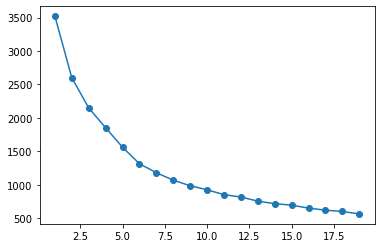

In [10]:
frame=pd.DataFrame({'cluster':range(1,20),'WSS':WSS})
plt.plot(frame['cluster'],frame['WSS'],marker='o')

In [11]:
km=KMeans(n_clusters=6,init='random').fit(ds)
km.inertia_

1348.278651199586

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(ds,km.labels_)

0.35515943267461014

In [23]:
silhouette_avg=[]

In [25]:
for clusters in range(2,21):
    kmeans=KMeans(n_clusters=clusters)
    kmeans.fit(ds)
    cluster_labels=kmeans.labels_
    silhouette_avg.append(silhouette_score(ds,cluster_labels))

Text(0, 0.5, 'Silhouette Score')

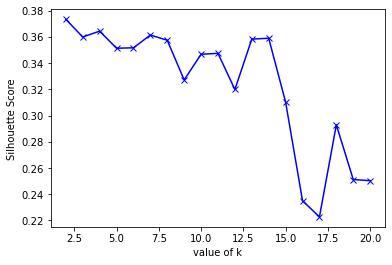

In [26]:
plt.plot(range(2,21),silhouette_avg,'bx-')
plt.xlabel('value of k')
plt.ylabel('Silhouette Score')